In [1]:
import pandas as pd 
import numpy as np 
from time import time
import seaborn as sns 
!pip install vpython
from IPython.display import display 
%matplotlib inline

  Attempting uninstall: cryptography
    Found existing installation: cryptography 3.1.1
    Uninstalling cryptography-3.1.1:
      Successfully uninstalled cryptography-3.1.1


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

jupyter-server 1.6.4 requires tornado>=6.1.0, but you'll have tornado 6.0.4 which is incompatible.


In [2]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
data=pd.read_csv("C:\\Users\\channu\\Downloads\\SalaryData_Train.csv")

In [4]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


<AxesSubplot:>

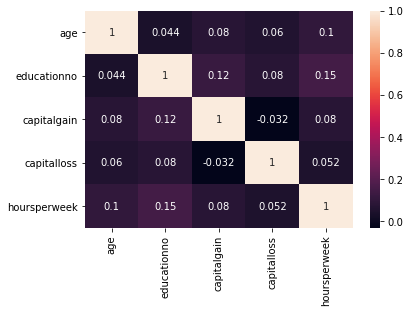

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [24]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

In [25]:
print('categorical variables are',categorical)

categorical variables are ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [26]:
data[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [27]:
data[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [28]:
# view frequency counts of values in categorical variables
for var in categorical:
    print(data[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [31]:
# view frequency distribution of categorical variables
for var in categorical:
    print(data[var].value_counts()/np.float(len(data)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [35]:
numeric=[var for var in data.columns if data[var].dtype!='O']

In [36]:
print('numeric variables are',numeric)

numeric variables are ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [40]:
data[numeric].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [43]:
x = data.drop(['Salary'],axis=1)
y = data['Salary']

# VISUALAIZATION 

In [46]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='count', ylabel='workclass'>

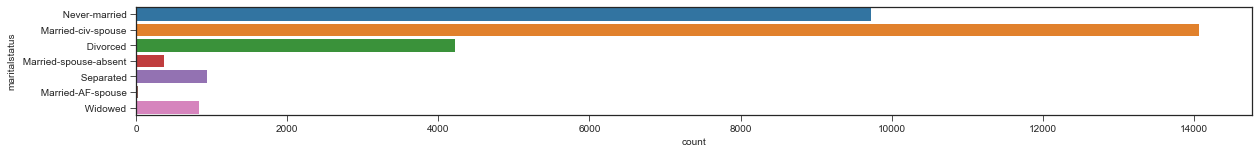

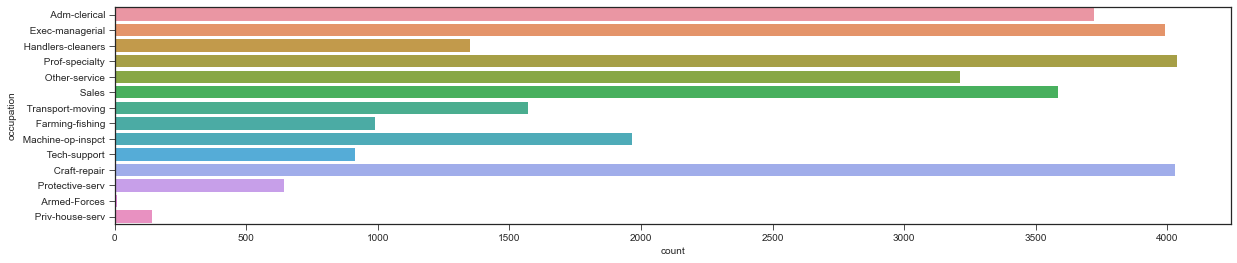

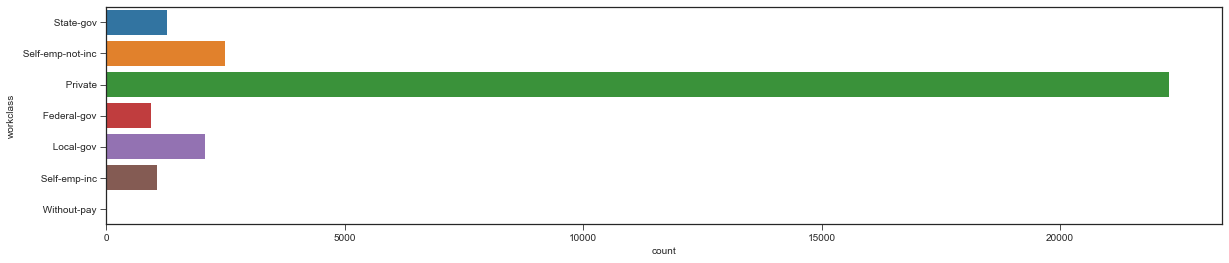

In [47]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=data)
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=data)
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="workclass", data=data)


C:\Users\channu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\channu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='hoursperweek'>

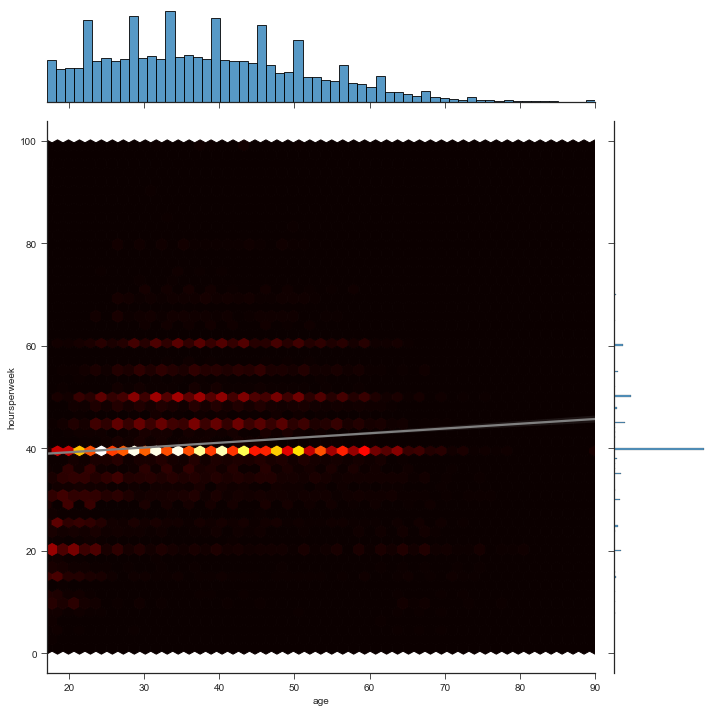

In [50]:
g=sns.jointplot(x='age', y='hoursperweek',data=data,kind='hex',cmap='hot',size=10)
sns.regplot(data.age, data['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')


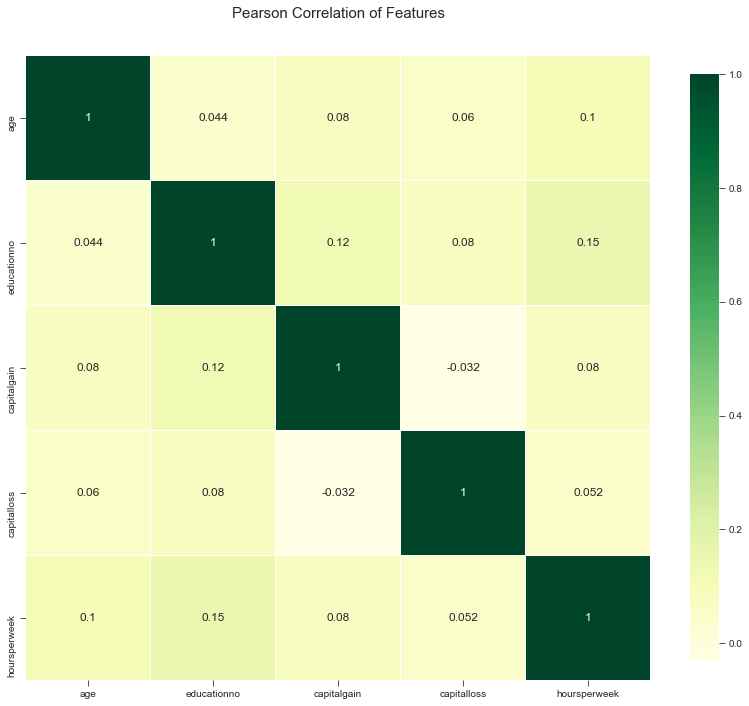

In [53]:
#correlation heatmap of dataset
def correlation_heatmap(data):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        data.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(data)

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [56]:
x_train.shape, x_test.shape

((21112, 13), (9049, 13))

In [57]:
x_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [59]:
categorical = [col for col in x_train.columns if x_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [60]:
x_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [61]:
for df2 in [x_train, x_test]:
    df2['workclass'].fillna(x_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(x_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(x_train['native'].mode()[0], inplace=True)

C:\Users\channu\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [62]:
x_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [63]:
x_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [64]:
x_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [65]:
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [66]:
x_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
8166,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
7138,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States
437,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States
5436,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
6541,Self-emp-not-inc,HS-grad,Married-civ-spouse,Tech-support,Husband,White,Male,United-States


In [67]:
!pip install category_encoders

import category_encoders as ce

In [70]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])


In [72]:
x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

C:\Users\channu\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [73]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
x_train.shape

(21112, 102)

In [75]:
x_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8391,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16669,53,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [77]:
# Feature Scaling 
#Table of Contents

cols = x_train.columns

In [79]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [80]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.894737,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
from sklearn.naive_bayes import GaussianNB

In [84]:
gnb=GaussianNB()

In [85]:
gnb.fit(x_train,y_train)

GaussianNB()

In [86]:
y_pred=gnb.predict(x_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7995


In [91]:
y_pred_train = gnb.predict(x_train)

y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [92]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8023


In [94]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8023
Test set score: 0.7995


In [95]:
# check class distribution in test set
y_test.value_counts()

 <=50K    6798
 >50K     2251
Name: Salary, dtype: int64

In [102]:
null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
cm=confusion_matrix(y_test,y_pred)

In [105]:
print('confusion matrix\n\n',cm)
print('\n true positive(tp)=',cm[0,0])
print('\n true negative(tn)=',cm[0,1])
print('\n false psoitive(fp)=',cm[1,0])
print('\n false negative(fn)=',cm[1,1])

confusion matrix

 [[5422 1376]
 [ 438 1813]]

 true positive(tp)= 5422

 true negative(tn)= 1376

 false psoitive(fp)= 438

 false negative(fn)= 1813


<AxesSubplot:>

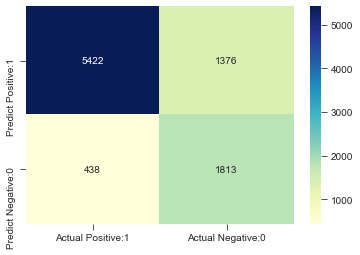

In [106]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      6798
        >50K       0.57      0.81      0.67      2251

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



In [108]:
#classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [116]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7995


In [117]:
classification_error=(FP + FN)/float(FP+FN+TP+TN)

In [118]:
print('classification error : {0:0.4f}'.format(classification_error))

classification error : 0.2005


In [119]:
precision=TP/float(TP+FP)

In [120]:
print('precision: {0:0.4f}'.format(precision))

precision: 0.7976


In [121]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9253


In [122]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9253


In [123]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


False Positive Rate : 0.4315


In [125]:
y_pred_prob = gnb.predict_proba(x_test)[0:10]

y_pred_prob

array([[9.99955511e-01, 4.44887598e-05],
       [9.95935549e-01, 4.06445120e-03],
       [8.63901480e-01, 1.36098520e-01],
       [9.99999906e-01, 9.37239455e-08],
       [8.80888343e-02, 9.11911166e-01],
       [9.99562896e-01, 4.37103927e-04],
       [5.34482750e-06, 9.99994655e-01],
       [6.28497161e-01, 3.71502839e-01],
       [5.46536963e-04, 9.99453463e-01],
       [9.99999570e-01, 4.30495598e-07]])

In [126]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.999956,4.448876e-05
1,0.995936,4.064451e-03
2,0.863901,1.360985e-01
3,1.000000,9.372395e-08
4,0.088089,9.119112e-01
5,0.999563,4.371039e-04
6,0.000005,9.999947e-01
7,0.628497,3.715028e-01
8,0.000547,9.994535e-01
9,1.000000,4.304956e-07


In [127]:
y_pred1 = gnb.predict_proba(x_test)[:, 1]
y_pred1

array([4.44887598e-05, 4.06445120e-03, 1.36098520e-01, ...,
       2.39248459e-08, 4.49925639e-06, 6.03410355e-01])

Text(0, 0.5, 'Frequency')

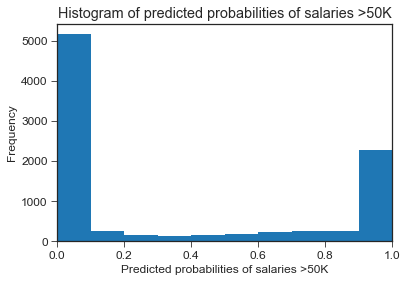

In [128]:
# plot histogram of predicted probabilities
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

C:\Users\channu\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


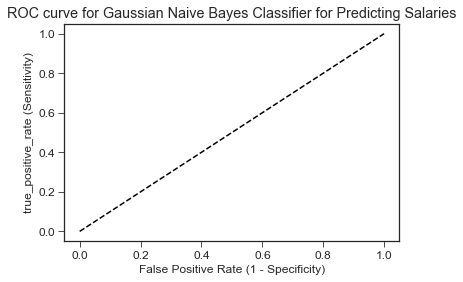

In [129]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '<50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('true_positive_rate (Sensitivity)')

plt.show()

In [130]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8902


In [132]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score


scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81676136 0.79829545 0.79014685 0.81288489 0.80388441 0.79062056
 0.80767409 0.7925154  0.79630507 0.80909522]


In [133]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8018


1)In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year.

The model yields a very good performance as indicated by the model accuracy which was found to be 0.7995

2)The training-set accuracy score is 0.8023 while the test-set accuracy to be 0.7995. These two values are quite comparable. So, there is no sign of overfitting.

3)I have compared the model accuracy score which is 0.7995 with null accuracy score which is 0.7582. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.

4)ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year.

5)Using the mean cross-validation, we can conclude that we expect the model to be around 80.60% accurate on average. If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training. Our original model accuracy is 0.7995, but the mean cross-validation accuracy is 0.8018. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.